**[Домашняя работа](#theory)**

# Урок 1. Алгоритм линейной регрессии. Градиентный спуск

### Простая линейная регрессия

Линейная регрессия - это метод прогнозирования, которому уже более 200 лет.  
Простая линейная регрессия - это отличный первый алгоритм машинного обучения для самостоятельной реализации, поскольку он быстро настраивается и достаточно прост для понимания.  
В этом уроке вы узнаете, как реализовать простой алгоритм линейной регрессии с нуля в Python. 

После завершения этого урока вы узнаете:  
- Как реализовать линейную регрессию "с нуля" на Python.  
- Как найти оптимальные коэффициенты линейной регрессии.  
- Как делать прогнозы и оценить работу модели.  

Давайте начнем!

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format='retina'
import warnings
warnings.simplefilter('ignore')

Линейная регрессия предполагает линейную зависимость между входными переменными (X) и целевой переменной (y).  
Это означает, что выход (y) может быть вычислен как **линейная комбинация** входных переменных (X).  
Если Х состоит из одной переменной, то линейная регрессия называется простой.  
В простой линейной регрессии мы можем использовать статистику обучающих данных для оценки коэффициентов, требуемых моделью для прогнозирования новых данных.  
Уравнение простой линейной регрессии может быть записано как:
$$y = w_0 + w_1 × X$$  
Как видите, это простое уравнение прямой, известное нам еще со школы.  
w0 и w1 - это коэффициенты, которые мы должны найти.  
w0 называется смещением или bias и отвечает за смещение регрессионной прямой по оси y относительно начала координат.  
w1 - это коэффициент при признаке Х, он отвечает за угол наклона прямой.  
Как только коэффициенты известны, мы можем использовать это уравнение для оценки целевой переменной (y), на новых данных (X_test).  
Когда признаков больше чем один, уравнение линейной регрессии принимает следующий вид:  
$$y = w_0 + \sum_{i=1}^m w_i x_i$$  
Если мы добавим фиктивный признак x0 = 1, тогда уравнение можно переписать чуть более компактно, убрав w0 под знак суммы:
$$y = \sum_{i=0}^m w_i x_i = \vec{w}^T \vec{x}$$. 
Так же его можно записать в мтаричном виде:  
$$\vec y = X \vec w + \epsilon$$  
ϵ – непрогнозируемая ошибка модели  

Непрогнозируемая ошибка складывается из:
- Смещение (Bias) – средняя ошибка по всевозможным наборам данных (показывает, насколько модель отличается от "идеальной")
- Дисперсия (Var) – вариативность ошибки (то, на сколько ошибка будет отличаться, если обучать модель на разных данных).  
Показывает, насколько утойчива модель.
- неустранимой ошибки: σ

![bias_var.png](bias_var.png)

Сгенерируем простой пример для наглядности:

In [6]:
X = np.array([[1, 1, 1, 1, 1,
               1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 
               0, 5, 10, 1, 2]]).T

In [7]:
X  # <- матрица "объекты-признаки" ([x0, x1])

array([[ 1,  1],
       [ 1,  1],
       [ 1,  2],
       [ 1,  1],
       [ 1,  3],
       [ 1,  0],
       [ 1,  5],
       [ 1, 10],
       [ 1,  1],
       [ 1,  2]])

In [8]:
X.shape

(10, 2)

In [9]:
y = [45, 55, 50, 59, 65, 35, 75, 80, 50, 60]

Построим модель линейной регрессии!

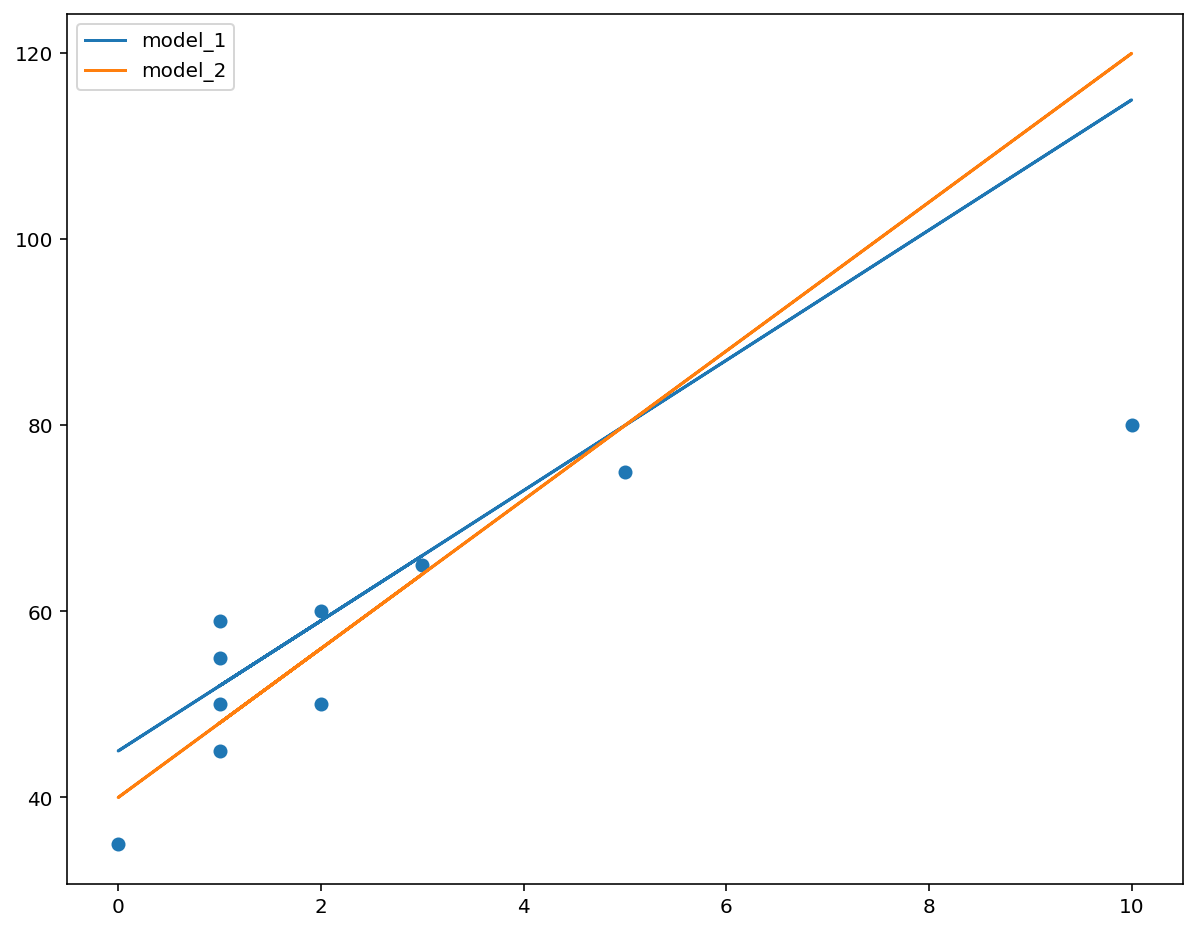

In [10]:
plt.figure(figsize=(10, 8))
plt.scatter(X[:,1], y)
plt.plot(X[:,1], 45*np.ones(10) + X[:,1]*7, label='model_1')
plt.plot(X[:,1], 40*np.ones(10) + X[:,1]*8, label='model_2')
plt.legend();

Сделаем прогноз значений y на обучающих данных:

In [11]:
y_pred1 = 45*np.ones(10) + X[:,1]*7
y_pred2 = 40*np.ones(10) + X[:,1]*8

In [12]:
y_pred2

array([ 48.,  48.,  56.,  48.,  64.,  40.,  80., 120.,  48.,  56.])

In [13]:
y

[45, 55, 50, 59, 65, 35, 75, 80, 50, 60]

### Как мы можем оценить работу модели?

1. Разность прогнозов

In [14]:
err1 = np.sum(y - y_pred1)
err2 = np.sum(y - y_pred2)
print(f'Разность прогнозов наших моделей: {err1}, {err2}')

Разность прогнозов наших моделей: -58.0, -34.0


2. Средняя абсолютная ошибка (MAE)

In [15]:
mae_1 = np.sum(np.abs(y - y_pred1))/len(y)
mae_2 = np.sum(np.abs(y - y_pred2))/len(y)
print(f'MAE наших моделей: {mae_1}, {mae_2}')

MAE наших моделей: 8.0, 8.4


In [16]:
def calc_mae(y, y_pred):
    return np.mean(np.abs(y - y_pred))

3. Среднеквадратичная ошибка (MSE)

In [17]:
mse_1 = np.mean((y - y_pred1)**2)
mse_2 = np.mean((y - y_pred2)**2)
print(f'MSE наших моделей: {mse_1}, {mse_2}')

MSE наших моделей: 154.4, 188.6


In [18]:
def calc_mse(y, y_pred):
    return np.mean((y - y_pred)**2)

4. RMSE

In [19]:
rmse_1 = np.sqrt(np.mean((y - y_pred1)**2))
rmse_2 = np.sqrt(np.mean((y - y_pred2)**2))
print(f'MSE наших моделей: {rmse_1}, {rmse_2}')

MSE наших моделей: 12.425779653607254, 13.733171520082315


5. Коэффициент детерминации (R2)

In [20]:
# предлагаю реализовать самим :)



### Методы поиска оптимальных параметров

1. **Метод наименьших квадратов (МНК)**   
Суть метода: минимизируем среднеквадратичную ошибку (MSE) между реальным значением целевой переменной и прогнозом, выданным моделью.   
$$\large \begin{array}{rcl}\mathcal{L}\left(X, \vec{y}, \vec{w} \right) &=& \frac{1}{2n} \sum_{i=1}^n \left(y_i - \vec{w}^T \vec{x}_i\right)^2 \\ &=& \frac{1}{2n} \left\| \vec{y} - X \vec{w} \right\|_2^2 \\ &=& \frac{1}{2n} \left(\vec{y} - X \vec{w}\right)^T \left(\vec{y} - X \vec{w}\right) \end{array}$$  

Для этого необходимо вычислить производные по параметрам модели, приравнять их к нулю и решить полученные уравнения относительно w  
$$\large\mathcal{L}{\partial \vec{w}} = 0$$
$$\vec{w} = \left(X^T X\right)^{-1} X^T \vec{y}$$  

Реализуем этот метод! (но для этого придется перемножить пару матриц О_о)  
Для тех, кто подзабыл как это делается: http://matrixmultiplication.xyz

In [21]:
W = np.linalg.inv(np.dot(X.T, X)) @ X.T @ y
print(W)

[47.23214286  3.91071429]


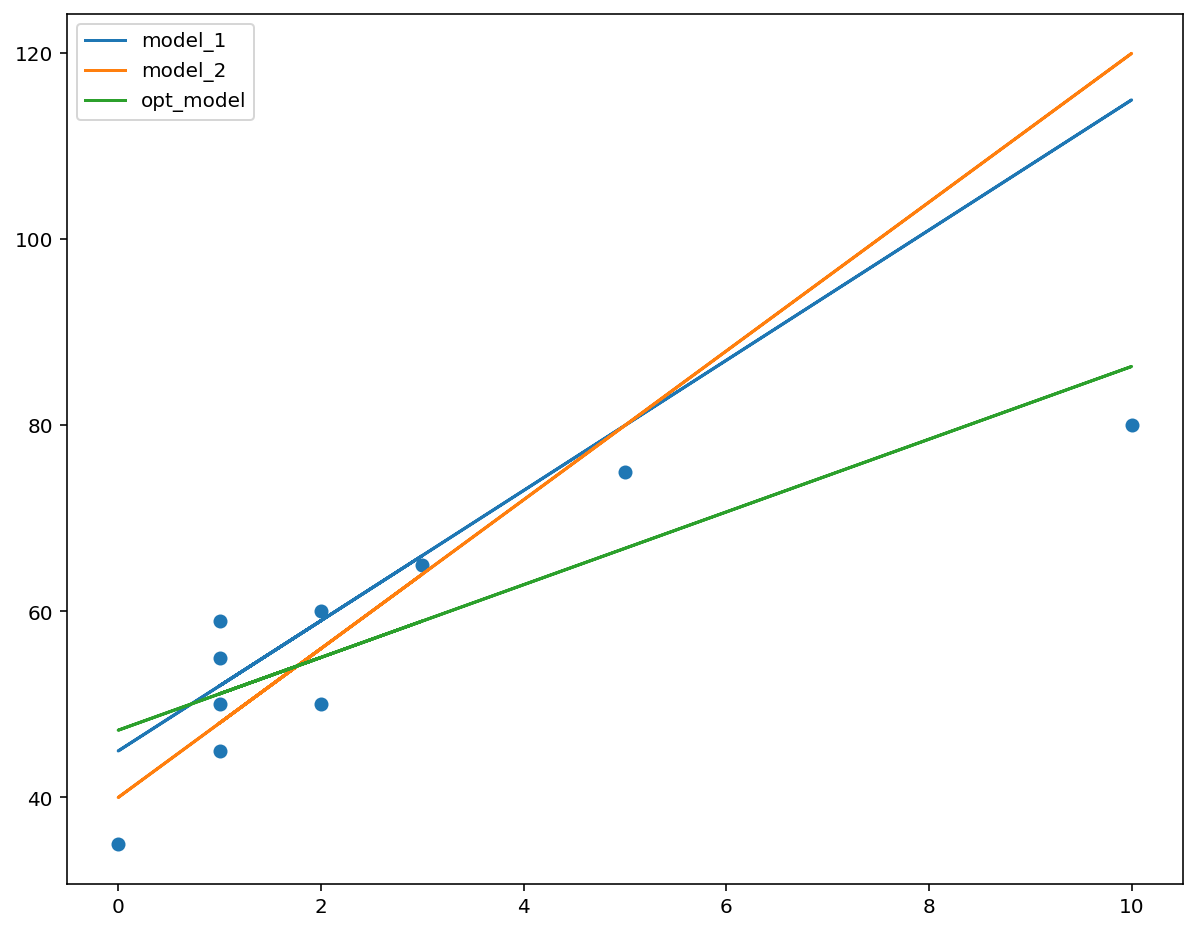

In [22]:
plt.figure(figsize=(10, 8))
plt.scatter(X[:,1], y)
plt.plot(X[:,1], 45*np.ones(10) + X[:,1]*7, label='model_1')
plt.plot(X[:,1], 40*np.ones(10) + X[:,1]*8, label='model_2')
plt.plot(X[:,1], W[0] + W[1] * X[:,1], label='opt_model')
plt.legend();

Оценка модели:

In [23]:
# метрики качества предыдущих моделей:
calc_mse(y, y_pred1)

154.4

In [24]:
calc_mae(y, y_pred1)

8.0

In [25]:
# прогноз модели с оптимальными параметрами:
y_pred3 = W[0] + W[1]*X[:,1]
y_pred3

array([51.14285714, 51.14285714, 55.05357143, 51.14285714, 58.96428571,
       47.23214286, 66.78571429, 86.33928571, 51.14285714, 55.05357143])

In [26]:
calc_mse(y, y_pred3)

45.93749999999999

In [27]:
calc_mae(y, y_pred3)

6.182142857142856

**2. Градиентный спуск**  

Градиентный спуск - это итеративный алгоритм поиска весов признаков.  
Алгоритм обновляет веса с учетом градиента функции потерь:  
w = w − learning rate × error × X

In [28]:
W = np.array([0.01, 0.1])

In [29]:
y_pred = np.dot(X, W)
y_pred

array([0.11, 0.11, 0.21, 0.11, 0.31, 0.01, 0.51, 1.01, 0.11, 0.21])

In [30]:
calc_mse(y, y_pred)

3423.6233

In [31]:
lr = 0.01

In [32]:
grad_0 = (1/len(y))*lr*(2*np.sum(X[:,0]*(W[0]*X[:,0] - y)))
grad_1 = (1/len(y))*lr*(2*np.sum(X[:,1]*(W[1]*X[:,1] - y)))

In [33]:
W[0] = W[0] - grad_0; W[0]

1.1578

In [34]:
W[1] = W[1] - grad_1; W[1]

3.6688

In [35]:
y_pred = np.dot(X, W)
y_pred

array([ 4.8266,  4.8266,  8.4954,  4.8266, 12.1642,  1.1578, 19.5018,
       37.8458,  4.8266,  8.4954])

In [36]:
calc_mse(y, y_pred)

2227.5964155919996

## Домашнее задание<a class="anchor" id="theory"></a>

1. Подберите скорость обучения (lr) и количество итераций (epoch):

In [37]:
n = X.shape[1]
epoch = 300
lr = np.random.uniform(low=0.00, high=0.03,)
W = np.array([1, 0.5])
W, lr

(array([1. , 0.5]), 0.00618396814687886)

In [38]:
while err <47:

    for i in range(epoch):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        for j in range(W.shape[0]):
            W[j] -= lr * (1/n * 2 * np.sum(X[:,j] * (y_pred - y)))

        if i % 20 == 0:
            print(f'# итерация: {i}, MSE: {err}, веса: {W}, lr{lr}')

NameError: name 'err' is not defined

*2. В этом коде мы избавляемся от итераций по весам, но тут есть ошибка, исправьте ее:

In [39]:
for i in range(epoch):
    y_pred = np.dot(X, W)
    err = calc_mse(y, y_pred)
#     for j in range(W.shape[0]):
#         W[j] -= lr * (1/n * 2 * np.sum(X[:, j] * (y_pred - y)))
#  исправлена ошибка:  
    W -= (lr * (1/n * 2 * np.sum(X * (y_pred - y).shape)))

    if i % 100 == 0:
        print(f'# итерация: {i}, MSE: {err}, веса: {W}')


# итерация: 0, MSE: 3173.15, веса: [-1.22622853 -1.72622853]
# итерация: 100, MSE: 1134265.4025134263, веса: [-223.84908182 -224.34908182]
# итерация: 200, MSE: 4327092.542953547, веса: [-446.47193511 -446.97193511]


*Задание 3: вместо того, чтобы задавать количество итераций, задайте условие остановки алгоритма - когда ошибка за итерацию
начинает изменяться ниже определенного порога (упрощенный аналог параметра tol в линейной регрессии в sklearn).

In [40]:

for i in range(epoch):
    y_pred = np.dot(X, W)
    err = calc_mse(y, y_pred)
    for j in range(W.shape[0]):
        W[j] -= lr * (1/n * 2 * np.sum(X[:,j] * (y_pred - y)))
    #     if i % 100 == 0:
        if err < 100.0:
            print(f'# итерация: {i}, MSE: {err}, веса: {W}')
            break

# итерация: 124, MSE: 98.86493709330176, веса: [37.62903431  5.74290642]
# итерация: 125, MSE: 95.6756950809627, веса: [37.92830182  5.74290642]
# итерация: 126, MSE: 92.8687003612279, веса: [38.20906273  5.74290642]
# итерация: 127, MSE: 90.39813860199646, веса: [38.47246146  5.74290642]
# итерация: 128, MSE: 88.22368655787088, веса: [38.71957171  5.74290642]
# итерация: 129, MSE: 86.30985393477054, веса: [38.95140073  5.74290642]
# итерация: 130, MSE: 84.62540413550326, веса: [39.16889353  5.74290642]
# итерация: 131, MSE: 83.14284443200373, веса: [39.37293663  5.74290642]
# итерация: 132, MSE: 81.83797724308745, веса: [39.56436178  5.74290642]
# итерация: 133, MSE: 80.68950519390701, веса: [39.74394926  5.74290642]
# итерация: 134, MSE: 79.67868351109334, веса: [39.9124311   5.74290642]
# итерация: 135, MSE: 78.78901408015221, веса: [40.07049408  5.74290642]
# итерация: 136, MSE: 78.00597617167759, веса: [40.2187825   5.74290642]
# итерация: 137, MSE: 77.31678944143363, веса: [40.35